# Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Data

In [2]:
train_data = pd.read_csv(r"C:\Users\reBuyTech\Desktop\prodigy_intern\PRODIGY_ML_1\train.csv")
test_data=pd.read_csv(r"C:\Users\reBuyTech\Desktop\prodigy_intern\PRODIGY_ML_1\test.csv")
sample_submission=pd.read_csv(r"C:\Users\reBuyTech\Desktop\prodigy_intern\PRODIGY_ML_1\sample_submission.csv")


In [3]:
print("Train:", train_data.shape)
print("Test:",test_data.shape)
print("Sample:", sample_submission.shape)

Train: (1460, 81)
Test: (1459, 80)
Sample: (1459, 2)


# Display the Datasets

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


# Get  Information About The Training Dataset

In [7]:
print(train_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# preprocessing step in the training dataset

In [9]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
null_columns = [(col, train_data[col].isnull().sum()) for col in train_data.columns if train_data[col].isnull().sum() > 0]

print("Columns with null values in the training data:")
for col_name, null_count in null_columns:
    print(f"{col_name} - {null_count} null values")


Columns with null values in the training data:
LotFrontage - 259 null values
Alley - 1369 null values
MasVnrType - 8 null values
MasVnrArea - 8 null values
BsmtQual - 37 null values
BsmtCond - 37 null values
BsmtExposure - 38 null values
BsmtFinType1 - 37 null values
BsmtFinType2 - 38 null values
Electrical - 1 null values
FireplaceQu - 690 null values
GarageType - 81 null values
GarageYrBlt - 81 null values
GarageFinish - 81 null values
GarageQual - 81 null values
GarageCond - 81 null values
PoolQC - 1453 null values
Fence - 1179 null values
MiscFeature - 1406 null values


In [11]:
import numpy as np
# Calculate mean for numerical columns to fill null values
mean_values_train = train_data.mean(numeric_only=True)

fill_values_train = {}

for col_name in train_data.columns:
    dtype = train_data[col_name].dtype
    if dtype in [np.float64, np.float32]:
        fill_values_train[col_name] = mean_values_train[col_name]  
    elif dtype in [np.int64, np.int32]:
        fill_values_train[col_name] = mean_values_train[col_name]  
    elif dtype == object:
        fill_values_train[col_name] = train_data[col_name].mode()[0]  

# Fill null values in the training data
train_data_filled = train_data.fillna(fill_values_train)

In [12]:
train_data_filled.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


# Get Statistical Information About Training Dataset

In [13]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

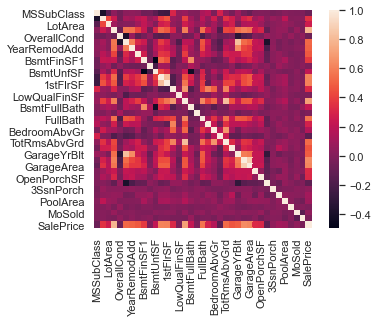

In [14]:
corr = train_data.select_dtypes(include = ['float64', 'int64']).iloc[:,1:].corr()
sns.set(font_scale=1)  
sns.heatmap(corr, vmax=1, square=True)

# About Test Dataset

In [15]:
print(test_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [17]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [18]:
null_columns = [(col, test_data[col].isnull().sum()) for col in test_data.columns if test_data[col].isnull().sum() > 0]

print("Columns with null values in the testing data:")
for col_name, null_count in null_columns:
    print(f"{col_name} - {null_count} null values")

Columns with null values in the testing data:
MSZoning - 4 null values
LotFrontage - 227 null values
Alley - 1352 null values
Utilities - 2 null values
Exterior1st - 1 null values
Exterior2nd - 1 null values
MasVnrType - 16 null values
MasVnrArea - 15 null values
BsmtQual - 44 null values
BsmtCond - 45 null values
BsmtExposure - 44 null values
BsmtFinType1 - 42 null values
BsmtFinSF1 - 1 null values
BsmtFinType2 - 42 null values
BsmtFinSF2 - 1 null values
BsmtUnfSF - 1 null values
TotalBsmtSF - 1 null values
BsmtFullBath - 2 null values
BsmtHalfBath - 2 null values
KitchenQual - 1 null values
Functional - 2 null values
FireplaceQu - 730 null values
GarageType - 76 null values
GarageYrBlt - 78 null values
GarageFinish - 78 null values
GarageCars - 1 null values
GarageArea - 1 null values
GarageQual - 78 null values
GarageCond - 78 null values
PoolQC - 1456 null values
Fence - 1169 null values
MiscFeature - 1408 null values
SaleType - 1 null values


In [19]:
import numpy as np
# Calculate mean for numerical columns to fill null values
mean_values_test = test_data.mean(numeric_only=True)

fill_values_test = {}

for col_name in test_data.columns:
    dtype = test_data[col_name].dtype
    if dtype in [np.float64, np.float32]:
        fill_values_test[col_name] = mean_values_test[col_name]  
    elif dtype in [np.int64, np.int32]:
        fill_values_test[col_name] = mean_values_test[col_name]  
    elif dtype == object:
        fill_values_test[col_name] = test_data[col_name].mode()[0]    

# Fill null values in the testing data
test_data_filled = test_data.fillna(fill_values_test)

In [20]:
test_data_filled.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,...,120,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,...,144,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal


# split the data

In [21]:
X_train = train_data_filled[['MasVnrArea', 'BedroomAbvGr', 'FullBath']]
y_train= train_data_filled['SalePrice'] 


In [22]:
X_test=test_data_filled [['MasVnrArea','BedroomAbvGr', 'FullBath']]

# creat linear regression model

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
print(y_pred)

[129486.82803974 141916.25234344 194654.34202346 ... 121357.20308533
 125422.01556253 209010.43699944]


In [26]:
data = {'prediction': y_pred,
        'Actual':sample_submission['SalePrice'] }
df = pd.DataFrame(data)
print(df)

         prediction         Actual
0     129486.828040  169277.052498
1     141916.252343  187758.393989
2     194654.342023  183583.683570
3     197708.830316  179317.477511
4     198719.154501  150730.079977
...             ...            ...
1454  125422.015563  167081.220949
1455  125422.015563  164788.778231
1456  121357.203085  219222.423400
1457  125422.015563  184924.279659
1458  209010.436999  187741.866657

[1459 rows x 2 columns]


# Evaluate the model

In [27]:
mse = mean_squared_error(sample_submission['SalePrice'], y_pred)
print(f"\nMean Squared Error: {mse}")



Mean Squared Error: 2430323003.1027412


# visualize the result

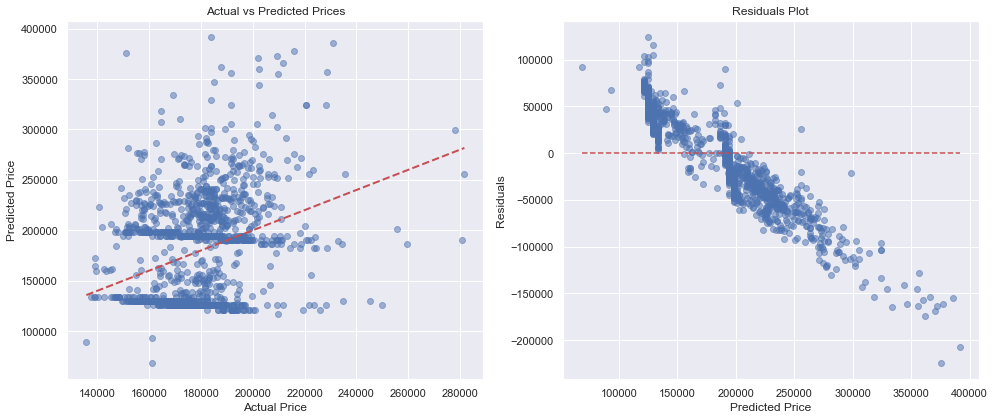

In [28]:
# Visualize the results
plt.figure(figsize=(14, 6))

# Scatter plot: Actual vs Predicted prices
if sample_submission['SalePrice'] is not None:
    plt.subplot(1, 2, 1)
    plt.scatter(sample_submission['SalePrice'], y_pred, alpha=0.5)
    plt.plot([sample_submission['SalePrice'].min(), sample_submission['SalePrice'].max()], [sample_submission['SalePrice'].min(), sample_submission['SalePrice'].max()], 'r--', lw=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Prices')

    # Residuals plot
    residuals = sample_submission['SalePrice']- y_pred
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='dashed')
    plt.xlabel('Predicted Price')
    plt.ylabel('Residuals')
    plt.title('Residuals Plot')

plt.tight_layout()
plt.show()